In [ ]:
'''

비지도 학습
주성분분석
k-평균 클러스터링
계층적 클러스터링
모델 기반 클러스터링
스케일링과 범주형 변수

'''

'\n\n비지도 학습\n주성분분석\nk-평균 클러스터링\n계층적 클러스터링\n모델 기반 클러스터링\n스케일링과 범주형 변수\n\n'

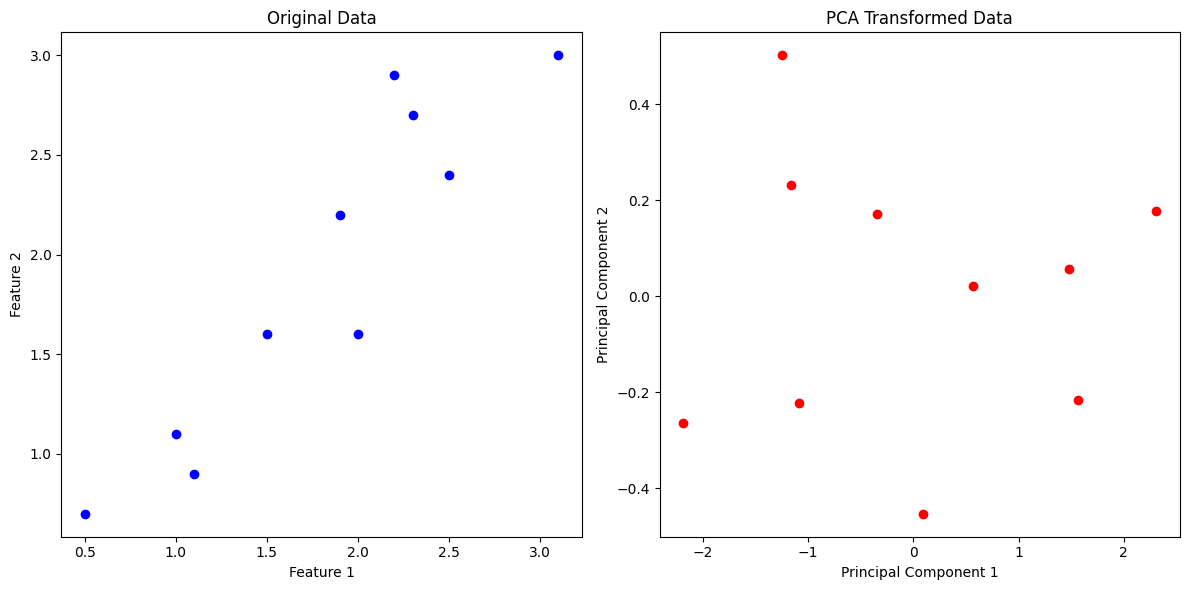

[[-1.08643242 -0.22352364]
 [ 2.3089372   0.17808082]
 [-1.24191895  0.501509  ]
 [-0.34078247  0.16991864]
 [-2.18429003 -0.26475825]
 [-1.16073946  0.23048082]
 [ 0.09260467 -0.45331721]
 [ 1.48210777  0.05566672]
 [ 0.56722643  0.02130455]
 [ 1.56328726 -0.21536146]]


In [ ]:
'''
비지도 학습 (Unsupervised Learning)
비지도 학습은 라벨이 없는 데이터를 사용하여 패턴을 찾는 머신러닝 방법입니다.
예를 들어, 사진 앨범에서 비슷한 사진들을 자동으로 그룹화하는 것이 비지도 학습의 한 예입니다.

주성분분석 (Principal Component Analysis, PCA)
PCA는 고차원의 데이터를 저차원으로 축소하여 주요 특징을 추출하는 방법입니다.
예를 들어, 여러 가지 특성을 가진 와인 데이터를 2차원으로 축소하여 시각화할 수 있습니다.

주성분분석에서 데이터 표준화의 이유
주성분분석(PCA)에서 데이터 표준화를 진행하는 이유는 각 변수의 단위와 범위가 다를 수 있기 때문입니다.
예를 들어, 한 변수는 센티미터 단위로 측정되고 다른 변수는 킬로그램 단위로 측정된다면, 이 변수들은 서로 다른 스케일을 가지게 됩니다.
이러한 경우, 큰 값을 가지는 변수가 PCA 결과에 더 큰 영향을 미치게 됩니다.
이를 방지하기 위해 데이터 표준화를 통해 모든 변수를 동일한 스케일로 맞추는 것이 중요합니다.

단계:

데이터 표준화

공분산 행렬 계산

공분산 행렬의 고유값과 고유벡터 계산

고유값을 기준으로 고유벡터 정렬

상위 k개의 고유벡터 선택

새로운 차원으로 데이터 변환
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 생성
data = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA 적용
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# 원본 데이터 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='blue', marker='o')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA 적용 후 데이터 시각화
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], color='red', marker='o')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

print(principal_components)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


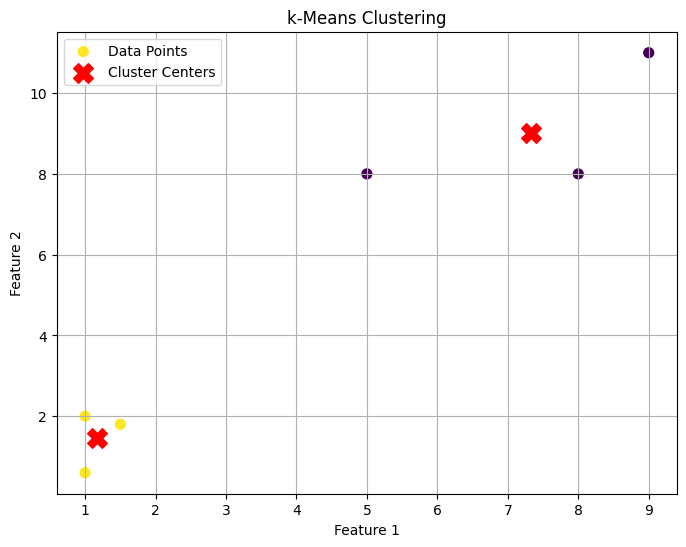

Cluster Centers:
 [[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Labels:
 [1 1 0 0 1 0]


In [ ]:
'''
k-평균 클러스터링 (k-Means Clustering)
k-평균 클러스터링은 데이터를 k개의 클러스터로 나누는 방법입니다.
예를 들어, 고객 데이터를 사용하여 비슷한 구매 패턴을 가진 고객 그룹을 찾을 수 있습니다.

단계:

클러스터 수 k 설정

초기 클러스터 중심 선택

각 데이터 포인트를 가장 가까운 클러스터 중심에 할당

클러스터 중심 업데이트

클러스터 중심이 더 이상 변하지 않을 때까지 3-4단계 반복
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 생성
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# k-평균 클러스터링 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# 클러스터 중심 및 레이블
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# 시각화
plt.figure(figsize=(8, 6))

# 데이터 포인트 시각화
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')

# 클러스터 중심 시각화
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('k-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 클러스터 중심 및 레이블 출력
print("Cluster Centers:\n", centers)
print("Labels:\n", labels)


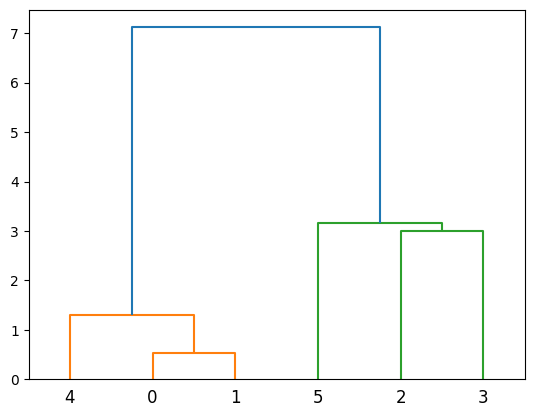

In [ ]:
'''
계층적 클러스터링 (Hierarchical Clustering)
계층적 클러스터링은 데이터 포인트를 계층적으로 그룹화하는 방법입니다.
예를 들어, 동물의 유사성을 기반으로 계층 구조를 만들 수 있습니다.

단계:

각 데이터 포인트를 개별 클러스터로 시작

가장 가까운 두 클러스터를 합침

모든 데이터가 하나의 클러스터가 될 때까지 2단계 반복
'''

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 데이터 생성
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# 계층적 클러스터링 적용
linked = linkage(data, 'single')

# 덴드로그램 시각화
dendrogram(linked)
plt.show()

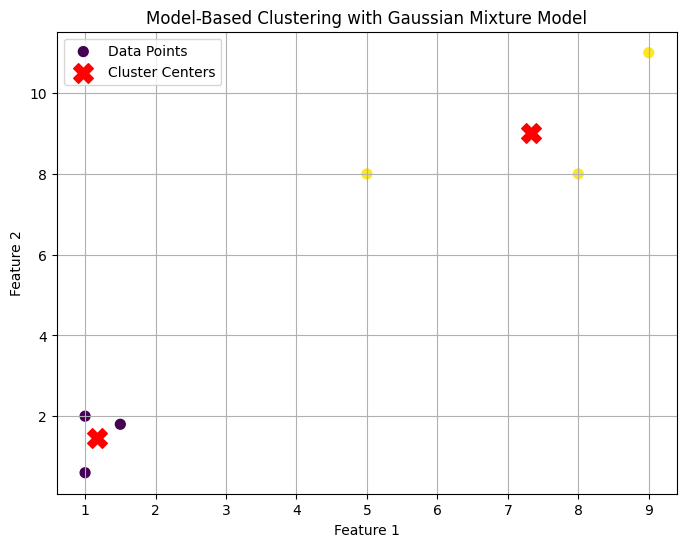

Cluster Centers:
 [[1.16666666 1.46666645]
 [7.3333304  8.99999663]]
Labels:
 [0 0 1 1 0 1]


In [ ]:
'''
모델 기반 클러스터링 (Model-Based Clustering)
모델 기반 클러스터링은 데이터가 특정 확률 모델을 따른다고 가정하고 클러스터를 찾는 방법입니다.
예를 들어, 고객 데이터를 사용하여 각 고객이 특정 구매 패턴을 따를 확률을 계산할 수 있습니다.

단계:

데이터에 적합한 확률 모델 선택

모델의 파라미터 추정

각 데이터 포인트의 클러스터 할당 확률 계산

클러스터 할당 및 파라미터 업데이트 반복
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 데이터 생성
data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# 모델 기반 클러스터링 적용
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# 클러스터 중심 및 레이블
centers = gmm.means_
labels = gmm.predict(data)

# 시각화
plt.figure(figsize=(8, 6))

# 데이터 포인트 시각화
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis', label='Data Points')

# 클러스터 중심 시각화
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('Model-Based Clustering with Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# 클러스터 중심 및 레이블 출력
print("Cluster Centers:\n", centers)
print("Labels:\n", labels)


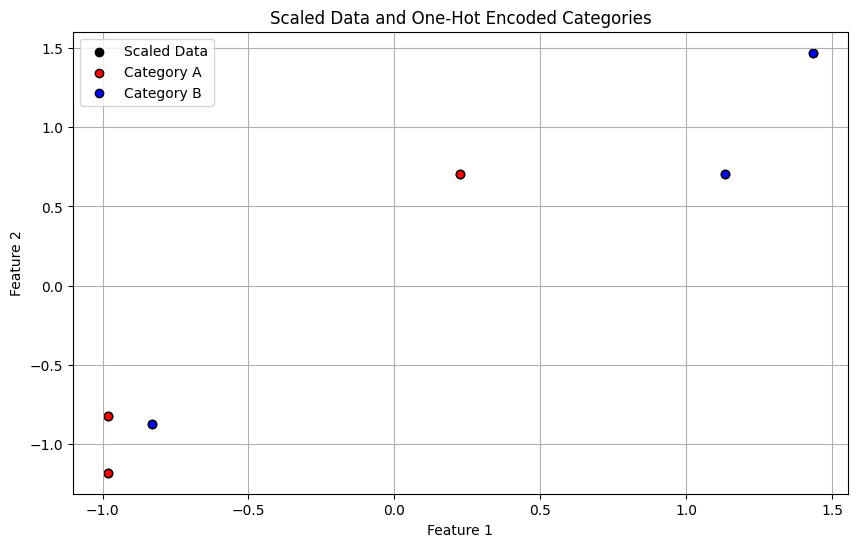

In [ ]:
'''
스케일링과 범주형 변수 (Scaling and Categorical Variables)
스케일링은 데이터의 크기를 조정하여 알고리즘의 성능을 향상시키는 방법입니다.
범주형 변수는 숫자가 아닌 값을 가지는 변수로, 이를 처리하기 위해 원-핫 인코딩을 사용할 수 있습니다.

1. 수치형 데이터로 변환
머신러닝 알고리즘은 일반적으로 수치형 데이터를 처리하는 데 최적화되어 있습니다.
범주형 변수는 문자나 문자열로 되어 있어 직접 사용할 수 없기 때문에, 이를 수치형 데이터로 변환해야 합니다. 원-핫 인코딩은 각 범주를 이진 벡터로 변환하여 이 문제를 해결합니다.

예를 들어, "색상"이라는 범주형 변수가 “빨강”, “초록”, “파랑” 세 가지 값을 가질 때, 원-핫 인코딩을 통해 다음과 같이 변환됩니다:

빨강: [1, 0, 0]
초록: [0, 1, 0]
파랑: [0, 0, 1]

2. 순서 정보 제거
범주형 변수를 숫자로 직접 변환하면 잘못된 순서 정보가 포함될 수 있습니다.
예를 들어, “빨강”, “초록”, "파랑"을 각각 1, 2, 3으로 변환하면,
알고리즘은 "빨강"이 "초록"보다 작고 "파랑"보다 작다고 잘못 해석할 수 있습니다. 원-핫 인코딩은 이러한 순서 정보를 제거하여 각 범주가 독립적임을 보장합니다.

3. 거리 계산의 정확성 향상
많은 머신러닝 알고리즘은 데이터 포인트 간의 거리를 계산하여 작동합니다.
범주형 변수를 숫자로 변환하면 거리 계산이 왜곡될 수 있습니다. 원-핫 인코딩은 각 범주를 독립적인 차원으로 변환하여 거리 계산의 정확성을 높입니다.

실생활 예시
1. 고객 세분화
고객의 성별, 지역, 직업 등의 범주형 변수를 원-핫 인코딩하여 고객을 세분화할 수 있습니다.
예를 들어, 마케팅 캠페인을 계획할 때, 특정 지역에 거주하는 고객 그룹을 타겟팅할 수 있습니다.

2. 추천 시스템
영화 추천 시스템에서 영화의 장르, 배우 등의 범주형 변수를 원-핫 인코딩하여 유사한 영화를 추천할 수 있습니다.
예를 들어, 사용자가 액션 영화를 좋아한다면, 액션 장르의 영화를 추천할 수 있습니다.

3. 의료 데이터 분석
환자의 성별, 병력 등의 범주형 변수를 원-핫 인코딩하여 질병 예측 모델을 만들 수 있습니다.
예를 들어, 특정 질병의 발생 확률을 예측할 때, 성별과 병력이 중요한 변수로 작용할 수 있습니다.

이처럼 원-핫 인코딩은 범주형 변수를 효과적으로 처리하여 머신러닝 모델의 성능을 향상시키는 데 중요한 역할을 합니다.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 데이터 생성
data = np.array([[1, 2, 'A'], [1.5, 1.8, 'B'], [5, 8, 'A'], [8, 8, 'B'], [1, 0.6, 'A'], [9, 11, 'B']])

# 숫자형 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[:, :2])

# 범주형 변수 원-핫 인코딩
encoder = OneHotEncoder()
data_encoded = encoder.fit_transform(data[:, 2].reshape(-1, 1)).toarray()

# 스케일링된 숫자형 데이터와 인코딩된 범주형 변수 결합
data_processed = np.hstack((data_scaled, data_encoded))

# 시각화
plt.figure(figsize=(10, 6))

# 스케일링된 숫자형 데이터 시각화
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='black', label='Scaled Data')

# 원-핫 인코딩된 범주형 변수 시각화
# 범주형 변수 A와 B를 각각 다른 색상으로 시각화
colors = ['red', 'blue']
categories = encoder.categories_[0]  # 범주 이름 가져오기
for i, label in enumerate(categories):
    mask = data[:, 2] == label
    plt.scatter(data_scaled[mask, 0], data_scaled[mask, 1], color=colors[i], label=f'Category {label}', edgecolor='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scaled Data and One-Hot Encoded Categories')
plt.legend()
plt.grid(True)
plt.show()
